# Exercise 1

In [46]:
# Importing libs
import cv2
import numpy as np
import matplotlib.pyplot as plt

## 3. Write a program to:
#### a) Open an image and show on screen the 3 channels separately:

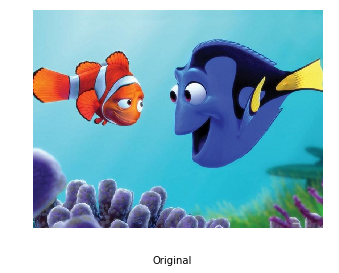

In [80]:
nemo1 = cv2.imread('images/nemo1.jpg')
nemo1 = cv2.cvtColor(nemo1, cv2.COLOR_BGR2RGB)

nemo_h, nemo_w, _ = nemo1.shape

plt.imshow(nemo1)
plt.axis('off')
plt.figtext(0.5, 0, 'Original', horizontalalignment='center')
plt.show()

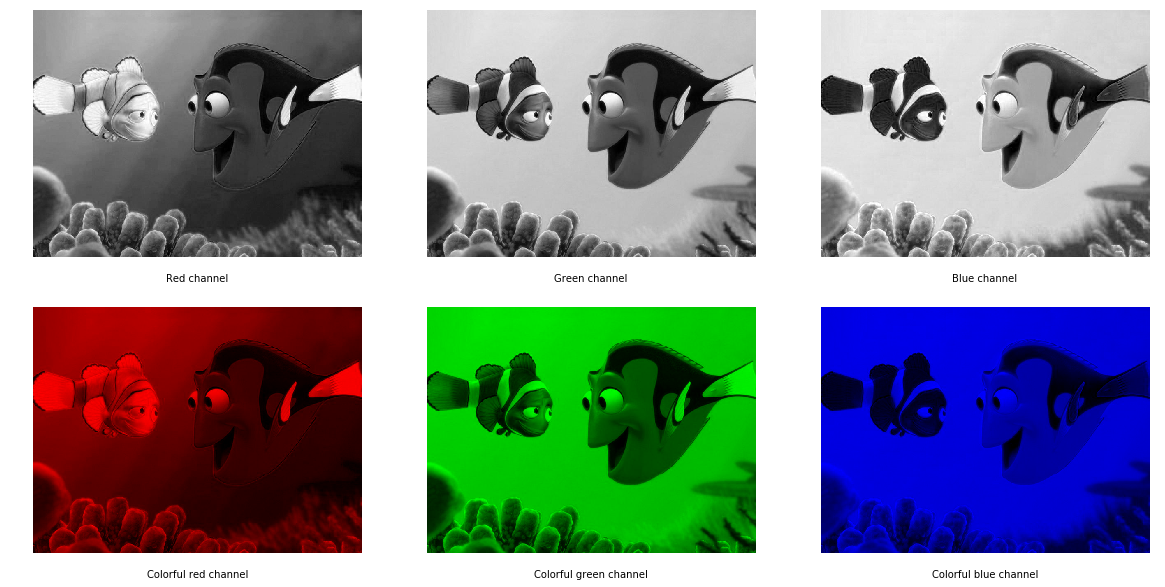

In [79]:
nemo1_r = nemo1[:,:,0]
nemo1_g = nemo1[:,:,1]
nemo1_b = nemo1[:,:,2]
zeros = np.zeros((nemo_h, nemo_w), 'uint8')

nemo1_r_colorful = cv2.merge((nemo1[:,:,0], zeros, zeros))
nemo1_g_colorful = cv2.merge((zeros, nemo1[:,:,1], zeros))
nemo1_b_colorful = cv2.merge((zeros, zeros, nemo1[:,:,2]))

# Defining figure size
plt.figure(figsize=(20,10))
ax1 = plt.subplot(231)
ax1.imshow(nemo1_r, cmap='gray')
ax2 = plt.subplot(232)
ax2.imshow(nemo1_g, cmap='gray')
ax3 = plt.subplot(233)
ax3.imshow(nemo1_b, cmap='gray')

ax4 = plt.subplot(234)
ax4.imshow(nemo1_r_colorful)
ax5 = plt.subplot(235)
ax5.imshow(nemo1_g_colorful)
ax6 = plt.subplot(236)
ax6.imshow(nemo1_b_colorful)

ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax4.axis('off')
ax5.axis('off')
ax6.axis('off')

ax1.text(0.5,-0.1, "Red channel", ha="center", transform=ax1.transAxes)
ax2.text(0.5,-0.1, "Green channel", ha="center", transform=ax2.transAxes)
ax3.text(0.5,-0.1, "Blue channel", ha="center", transform=ax3.transAxes)
ax4.text(0.5,-0.1, "Colorful red channel", ha="center", transform=ax4.transAxes)
ax5.text(0.5,-0.1, "Colorful green channel", ha="center", transform=ax5.transAxes)
ax6.text(0.5,-0.1, "Colorful blue channel", ha="center", transform=ax6.transAxes)

plt.show()

#### b) Open an image and show on screen the horizontally inverted image:

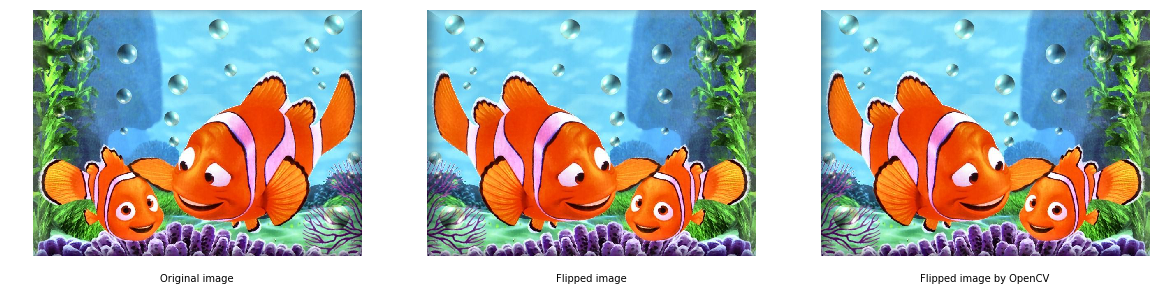

In [113]:
def flip(src):
    rows, cols, d = src.shape
    dst = np.zeros((rows, cols, d), dtype='uint8')
    for r in range(rows):
        for c in range(cols//2):
            dst[r,c] = src[r, (cols-1)-c]
            dst[r, (cols-1)-c] = src[r,c]
            
    return dst

nemo2 = cv2.imread('images/nemo2.jpg')
nemo2 = cv2.cvtColor(nemo2, cv2.COLOR_BGR2RGB)
nemo2_flipped = flip(nemo2)
nemo2_flipped_cv2 = cv2.flip(nemo2, 1)

plt.figure(figsize=(20,10))
ax1 = plt.subplot(131)
ax1.imshow(nemo2)
ax2 = plt.subplot(132)
ax2.imshow(nemo2_flipped)
ax3 = plt.subplot(133)
ax3.imshow(nemo2_flipped_cv2)

ax1.axis('off')
ax2.axis('off')
ax3.axis('off')

ax1.text(0.5,-0.1, "Original image", ha="center", transform=ax1.transAxes)
ax2.text(0.5,-0.1, "Flipped image", ha="center", transform=ax2.transAxes)
ax3.text(0.5,-0.1, "Flipped image by OpenCV", ha="center", transform=ax3.transAxes)

plt.show()

#### c) Open two images (a,b) of same size and show on screen a new image (c) with the blending of both images, using linear combination between them:

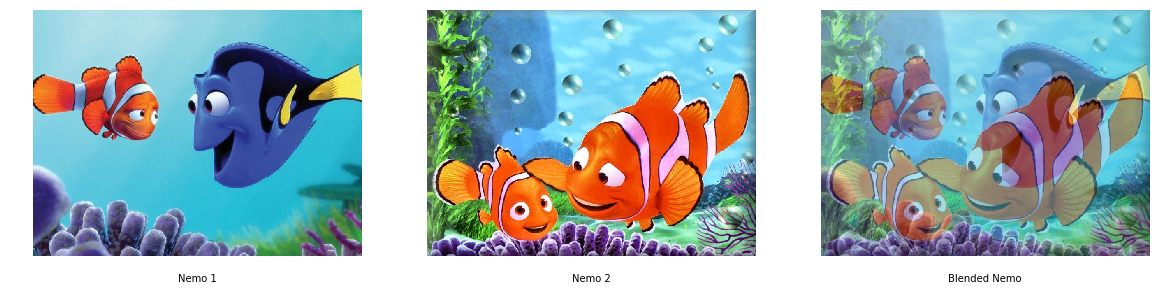

In [114]:
def blending(img1, img2, a=.5, b=.5):
    rows, cols, d = img1.shape
    dst = np.zeros((rows, cols, d), dtype='uint8')
    
    for r in range(rows):
        for c in range(cols):
            dst[r,c] = a*img1[r,c] + b*img2[r,c]
            
    return dst

blended_nemo = blending(nemo1, nemo2)

plt.figure(figsize=(20,10))
ax1 = plt.subplot(131)
ax1.imshow(nemo1)
ax2 = plt.subplot(132)
ax2.imshow(nemo2)
ax3 = plt.subplot(133)
ax3.imshow(blended_nemo)

ax1.axis('off')
ax2.axis('off')
ax3.axis('off')

ax1.text(0.5,-0.1, "Nemo 1", ha="center", transform=ax1.transAxes)
ax2.text(0.5,-0.1, "Nemo 2", ha="center", transform=ax2.transAxes)
ax3.text(0.5,-0.1, "Blended Nemo", ha="center", transform=ax3.transAxes)
plt.show()

#### d) Create a new vertical gradient image:

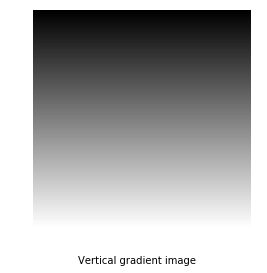

In [126]:
def gradient_vertical(min_color, max_color, width, height):
    image = min_color + np.zeros((height,width), dtype='float')
    
    ratio = (max_color - min_color) / height 
    
    for h in range(height):
        if h > 0:
            image[h,:] = image[h-1,:] + ratio
    return image

gv = gradient_vertical(0, 255, 300, 300)
plt.imshow(gv, cmap='gray')
plt.axis('off')
plt.figtext(0.5, 0, 'Vertical gradient image', horizontalalignment='center')
plt.show()

## 6. Using the nine available pictures, create a program to generates a new one with attenuated noise.

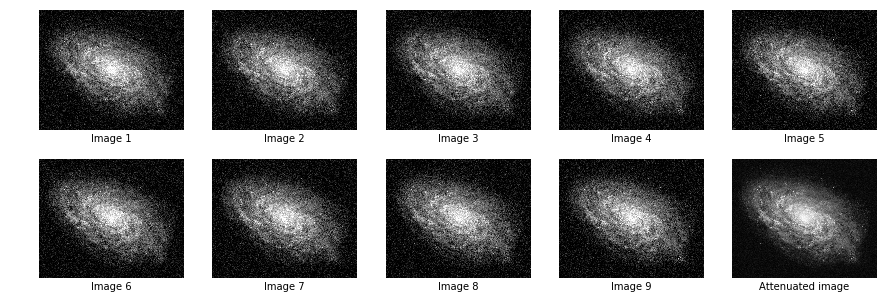

In [154]:
def attenuate_noise(imgs):
    length = len(imgs)
    rows, cols = imgs[0].shape    
    result = np.zeros((rows, cols), dtype='uint8')
    
    for r in range(rows):
        for c in range(cols):
            result[r,c] = np.mean([ imgs[i][r,c] for i in range(length)])
            
    return result

figures = [cv2.imread('images/a' + str(i) + '.jpg', 0) for i in range(1, 10)]
plt.figure(figsize=(15,5))
for i in range(9):
    ax = plt.subplot(2,5,i+1)
    ax.imshow(figures[i], cmap='gray')
    ax.axis('off')
    ax.text(0.5,-0.1, "Image " + str(i+1), ha="center", transform=ax.transAxes)

attenuated = attenuate_noise(figures)
ax = plt.subplot(2,5,10)
ax.imshow(attenuated, cmap='gray')
ax.axis('off')
ax.text(0.5,-0.1, "Attenuated image", ha="center", transform=ax.transAxes)
plt.show()